In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import audformat
import opensmile
import audeer

In [5]:
!paplay -s 127.0.0.1:9999 /scratch/fburkhardt/syntact_cat/synthesized_audio/de6_bored_p005968.wav

In [6]:
db_root = '/scratch/fburkhardt/syntact_cat'
db = audformat.Database.load(db_root)

In [ ]:
db.tables

In [7]:
df = (db.tables['emotion.categories.train.desired'] + db.tables['emotion.categories.test.desired']).get()
df_files = db.tables['files'].df
df['speaker'] = df_files.speaker

<AxesSubplot:>

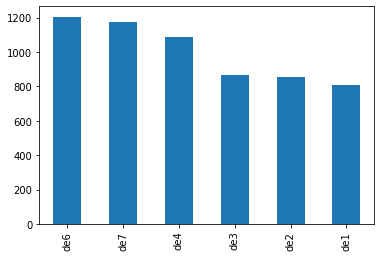

In [8]:
df.speaker.value_counts().plot(kind='bar')

In [ ]:
df.shape

In [9]:
smile = smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
path = 'feature.pkl'
if not os.path.exists(path):
    df_feats = smile.process_index(
        db.files,
        root=db.root,
    )
    df_feats.to_pickle(path, protocol=4)
df_feats = pd.read_pickle(path)

In [10]:
path = 'tsne.npy'
if not os.path.exists(path):
    tsne = TSNE(
        n_components=2,
        learning_rate=200.0,
        init='random',
        random_state=0,
    ).fit_transform(df_feats.values)
    np.save(path, tsne)
tsne = np.load(path)
tsne

array([[-20.144361 ,  -5.3356004],
       [-19.361362 ,  -5.915665 ],
       [-21.107885 ,  -9.765988 ],
       ...,
       [ 88.96763  ,   0.9656146],
       [ 78.3169   ,  -4.6193566],
       [ 91.58713  ,  -3.868254 ]], dtype=float32)

In [11]:
emotion = df['emotion']
speaker = db['files']['speaker'].get()
gender = db['files']['speaker'].get(map='gender')

In [14]:
df.index[0]

'synthesized_audio/de1_happy_p000000.wav'

<IPython.core.display.Javascript object>


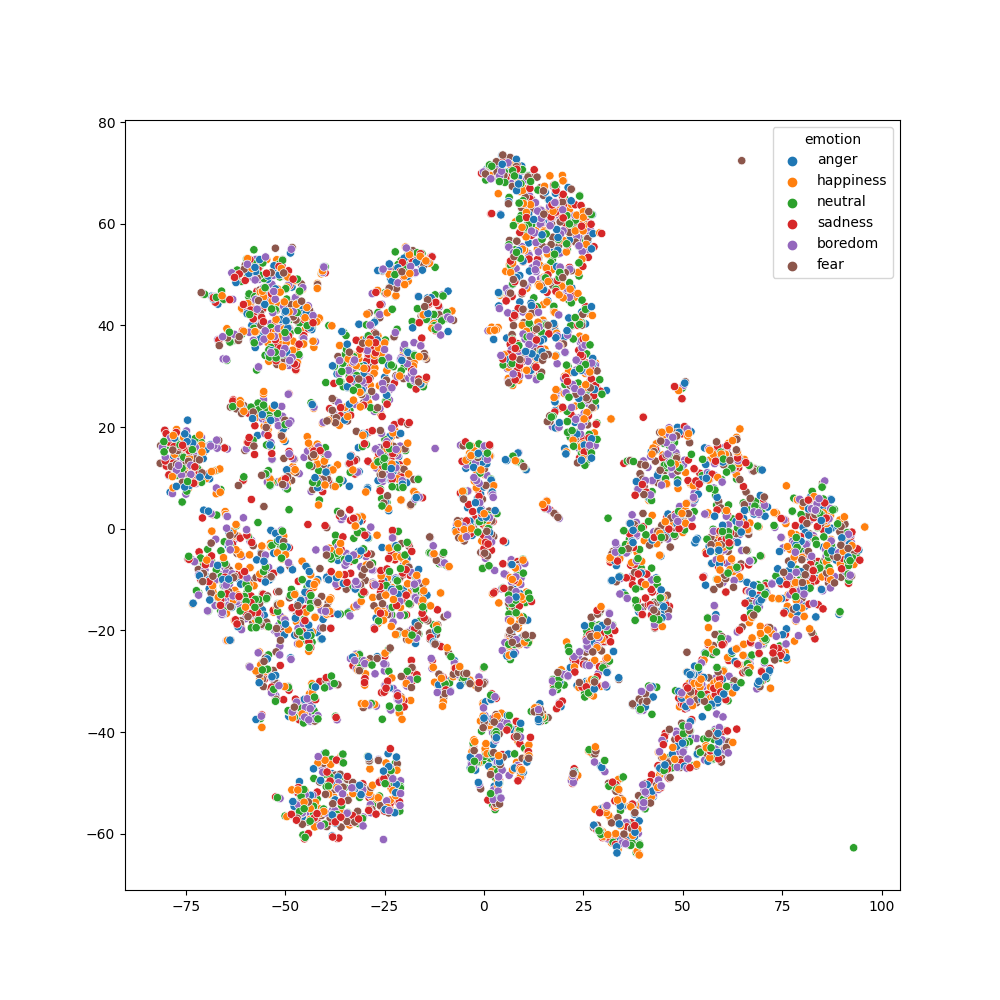

In [18]:
%matplotlib notebook


def on_pick(event):
    idx = event.ind[0]
    file = df.index[idx]
    path = audeer.path(db.root, file)
    text.set_text(path)
    os.system(f'paplay -s 127.0.0.1:9999 {path}')

    
fig, ax = plt.subplots(1, 1, figsize=[10, 10])
sns.scatterplot(
    x=tsne[:, 0],
    y=tsne[:, 1],
    hue=emotion,
    picker=True,
    ax=ax,
)
ax.figure.canvas.mpl_connect('pick_event', on_pick)
text = ax.text(ax.get_xlim()[0] + 1, ax.get_ylim()[0] + 1, '')

In [17]:
emotion.unique()

['happiness', 'anger', 'sadness', 'neutral', 'boredom', 'fear']
Categories (6, object): ['happiness', 'anger', 'sadness', 'neutral', 'boredom', 'fear']